In [20]:
import os
import pydicom as dicom
import pandas as pd
from tabulate import tabulate
import matplotlib as plt
from matplotlib import figure, pyplot
from statistics import median, mean
import numpy as np
import SimpleITK as sitk
import csv
import seaborn as sns

In [13]:
# Set variables
m_yes = 0
m_no = 0
f_yes = 0
f_no = 0

y_age = []
n_age = []

y_pixel = []
n_pixel = []

y_slice = []
n_slice = []
y_scanner = []
n_scanner = []

y_kvp = []
n_kvp = []

In [14]:
# Load data
dataPath = "/Users/ilanadeutsch/Desktop/TextureAnalysisFinal"
dataDir = os.listdir(dataPath)

# Load data curation
curation = pd.read_excel(r"/Users/ilanadeutsch/Desktop/BAP1 data curation.xlsx", sheet_name = "Disease laterality - Feng")

for caseNum, case in enumerate(dataDir):

    # Skip invisible entry
    if case == ".DS_Store":
        continue

    # Define image path
    imgsPath = os.path.join(dataPath, dataDir[caseNum], "OriginalImgs")
    imgsDir = os.listdir(imgsPath)
    
    # Read in dicom info
    ds = dicom.read_file(os.path.join(imgsPath, imgsDir[0]))

    # Link to patient to BAP1 status
    for ipatient,patient in enumerate(curation["Case"]):
        if patient in case:
            status = curation.iloc[ipatient,7]

    # Determine sex
    if ds.PatientSex == "M":
       if status == "Yes":
         m_yes = m_yes + 1
       else:
           m_no = m_no +1
    if ds.PatientSex == "F":
        if status == "Yes":
            f_yes = f_yes + 1
        else:
           f_no = f_no +1

    # Determine age
    if status == "Yes":
        y_age.append((int(ds.PatientAge[1:3])))
    else:
        n_age.append((int(ds.PatientAge[1:3])))

    # Scanner data
    if status == "Yes":
        y_slice.append(int(ds.SliceThickness))
        y_scanner.append(ds.Manufacturer)
        y_pixel.append(float(ds.PixelSpacing[0]))
        y_kvp.append(float(ds.KVP))
    else:
        n_slice.append(int(ds.SliceThickness))
        n_scanner.append(ds.Manufacturer)
        n_pixel.append(float(ds.PixelSpacing[0]))
        n_kvp.append(float(ds.KVP))

In [15]:
# Calculate medians and ranges
y_median = median(y_age)
n_median = median(n_age)

y_range = f"{min(y_age)}-{max(y_age)}"
n_range = f"{min(n_age)}-{max(n_age)}"

t_age = y_age + n_age
t_median = int(median(t_age))
t_range = f"{min(t_age)}-{max(t_age)}"

y_slice_median = median(y_slice)
y_slice_range = f"{min(y_slice)}-{max(y_slice)}"
n_slice_median = median(n_slice)
n_slice_range = f"{min(n_slice)}-{max(n_slice)}"

t_slice = y_slice + n_slice
t_slice_median = median(t_slice)
t_slice_range = f"{min(t_slice)}-{max(t_slice)}"

# Sums
n_GE = len([scanner for scanner in n_scanner if scanner == "GE MEDICAL SYSTEMS"])
y_GE = len([scanner for scanner in y_scanner if scanner == "GE MEDICAL SYSTEMS"])

n_philips = len([scanner for scanner in n_scanner if scanner == "Philips"])
y_philips = len([scanner for scanner in y_scanner if scanner == "Philips"])

n_toshiba = len([scanner for scanner in n_scanner if scanner == "TOSHIBA"])
y_toshiba = len([scanner for scanner in y_scanner if scanner == "TOSHIBA"])

n_siemens = len([scanner for scanner in n_scanner if scanner == "SIEMENS"])
y_siemens = len([scanner for scanner in y_scanner if scanner == "SIEMENS"])

y_pixel_median = "{:.2}".format(median(y_pixel))
y_pixel_range = f"{round(min(y_pixel),2)}-{round(max(y_pixel),2)}"

n_pixel_median = "{:.2f}".format(median(n_pixel))
n_pixel_range = f"{round(min(n_pixel),2)}-{round(max(n_pixel),2)}"

t_pixel_median = "{:.2f}".format(median(n_pixel + y_pixel))
t_pixel_range = f"{round(min(n_pixel + y_pixel),2)}-{round(max(n_pixel + y_pixel),2)}"

n_kvp_median = "{:.2f}".format(median(n_kvp))
n_kvp_range = f"{round(min(n_kvp),2)}-{round(max(n_kvp),2)}"

y_kvp_median = "{:.2f}".format(median(y_kvp))
y_kvp_range = f"{round(min(y_kvp),2)}-{round(max(y_kvp),2)}"

t_kvp_median = "{:.2f}".format(median(n_kvp+y_kvp))
t_kvp_range = f"{round(min(n_kvp),2)}-{round(max(n_kvp+y_kvp),2)}"

In [17]:
# Display Demographic Data
headers = ["Characteristic","Total (n = 131)", "BAP1 Mutation Status [+] (n = 58) ","BAP1 Mutation Status [-] (n = 63)"]
data = [["Sex","","",""],["Male", m_yes + m_no ,m_yes,m_no],["Female",f_yes + f_no ,f_yes,f_no],["Age","","",""],["Median",int(t_median),y_median,n_median],["Range",t_range,y_range,n_range]]

print(tabulate(data, headers=headers))

Characteristic    Total (n = 131)    BAP1 Mutation Status [+] (n = 58)     BAP1 Mutation Status [-] (n = 63)
----------------  -----------------  ------------------------------------  -----------------------------------
Sex
Male              84                 40                                    44
Female            47                 18                                    29
Age
Median            69                 69.0                                  69
Range             21-90              51-90                                 21-81


In [19]:
# CT data
headers = ["Characteristic","Total (n = 131)", "BAP1 Mutation Status [+] (n = 58) ","BAP1 Mutation Status [-] (n = 63)"]
data = [["Pixel Size [mm]","","",""],["Median",t_pixel_median,y_pixel_median,n_pixel_median], ["Range",t_pixel_range,y_pixel_range,n_pixel_range],
        ["Slice Thickness [mm]","","",""],["Median","3",y_slice_median,n_slice_median],["Range","1-5",y_slice_range,n_slice_range],["kVp [kV]","","",""],
        ["Median",t_kvp_median,y_kvp_median,n_kvp_median],["Range",t_kvp_range,y_kvp_range,n_kvp_range],["Scanner Manufacturer","","",""],
        ["GE",y_GE + n_GE,y_GE,n_GE],["Philips",y_philips + n_philips,y_philips,n_philips],
        ["Toshiba", y_toshiba+n_toshiba,y_toshiba,n_toshiba],["Siemens",y_siemens +n_siemens,y_siemens,n_siemens],]

print(tabulate(data, headers=headers))

Characteristic        Total (n = 131)    BAP1 Mutation Status [+] (n = 58)     BAP1 Mutation Status [-] (n = 63)
--------------------  -----------------  ------------------------------------  -----------------------------------
Pixel Size [mm]
Median                0.72               0.71                                  0.73
Range                 0.56-1.07          0.57-1.07                             0.56-0.95
Slice Thickness [mm]
Median                3                  3.0                                   3
Range                 1-5                1-5                                   1-5
kVp [kV]
Median                120.00             120.00                                120.00
Range                 80.0-140.0         100.0-120.0                           80.0-140.0
Scanner Manufacturer
GE                    65                 30                                    35
Philips               43                 19                                    24
Toshiba               10    

In [22]:
# Threshold map 
def thresholdedMap(map,threshold):
    
    size = map.GetSize()
    im = np.zeros(size)
    for i in range(size[0]):
        for j in range(size[1]):
            if map[i,j]>= threshold:
                im[i,j] = 1
            else:
                im[i,j] = 0
    return im

In [27]:
# Initialize variables
size = []
names = []

y_size = []
n_size = []

tot_y_size = []
tot_n_size = []

y_size_print = []
n_size_print = []

# Load data
dataPath = "/Users/ilanadeutsch/Desktop/TextureAnalysisFinal"
dataDir = os.listdir(dataPath)

# Load data curation
curation = pd.read_excel(r"/Users/ilanadeutsch/Desktop/BAP1 data curation.xlsx", sheet_name = "Disease laterality - Feng")

for caseNum, case in enumerate(dataDir):

    # Reset total area for new case
    tot_size_temp = 0

    # Skip invisible entries
    if case == ".DS_Store":
        continue

    # Save a list of the case names
    names.append(case)

    # Define image path
    imgsPath = os.path.join(dataPath, dataDir[caseNum], "OriginalImgs")
    imgsDir = os.listdir(imgsPath)
        
    # Read in dicom info
    ds = dicom.read_file(os.path.join(imgsPath, imgsDir[0]))

    # Define map
    mapsPath = os.path.join(dataPath, dataDir[caseNum], "Masks_Resampled")
    mapsDir = os.listdir(mapsPath)

    # Loop through slices
    for sliceNum, slice in enumerate(mapsDir):

        # Define probability map
        mapPath = os.path.join(mapsPath, mapsDir[int(sliceNum)])
        map = sitk.ReadImage(mapPath)

        # Threshold map
        map = thresholdedMap(map,0.01)

        # Link to patient to BAP1 status
        for ipatient,patient in enumerate(curation["Case"]):
            if patient in case:
                status = curation.iloc[ipatient,7]
                
        # Save tumor size according to BAP1 status
        if status == "Yes":
            if sliceNum == 2:
                y_size.append(sum(map[map==1])*(ds.PixelSpacing[0]*ds.PixelSpacing[1]))
                size.append(sum(map[map==1])*(ds.PixelSpacing[0]*ds.PixelSpacing[1]))
            tot_size_temp = + tot_size_temp + sum(map[map==1])*ds.PixelSpacing[0]*ds.PixelSpacing[1]
            tot_y_size.append(tot_size_temp)
        else:
            if sliceNum == 2:
                n_size.append(sum(map[map==1])*(ds.PixelSpacing[0]*ds.PixelSpacing[1]))
                size.append(sum(map[map==1])*(ds.PixelSpacing[0]*ds.PixelSpacing[1]))
            tot_size_temp = + tot_size_temp + sum(map[map==1])*ds.PixelSpacing[0]*ds.PixelSpacing[1]
            tot_n_size.append(tot_size_temp)


0.789062
0.789062
0.789062
0.738281
0.738281
0.738281
0.662
0.662
0.662
0.800781
0.800781
0.800781
1.075
1.075
1.075
0.67578125
0.67578125
0.67578125
0.664062
0.664062
0.664062
0.769531
0.769531
0.769531
0.703125
0.703125
0.703125
0.666015625
0.666015625
0.666015625
0.7109375
0.7109375
0.7109375
0.703125
0.703125
0.703125
0.734375
0.734375
0.734375
0.644531
0.644531
0.644531
0.751953125
0.751953125
0.751953125
0.741
0.741
0.741
0.794921875
0.794921875
0.794921875
0.564453
0.564453
0.564453
0.86328125
0.86328125
0.86328125
0.703125
0.703125
0.703125
0.658203125
0.658203125
0.658203125
0.740234
0.740234
0.740234
0.828125
0.828125
0.828125
0.70703125
0.70703125
0.70703125
0.878906
0.878906
0.878906
0.949219
0.949219
0.949219
0.675781
0.675781
0.675781
0.873046875
0.873046875
0.873046875
0.693359
0.693359
0.693359
0.734375
0.734375
0.734375
0.794921875
0.794921875
0.794921875
0.701171875
0.701171875
0.701171875
0.750000
0.750000
0.750000
0.88671875
0.88671875
0.88671875
0.80078125
0.800781

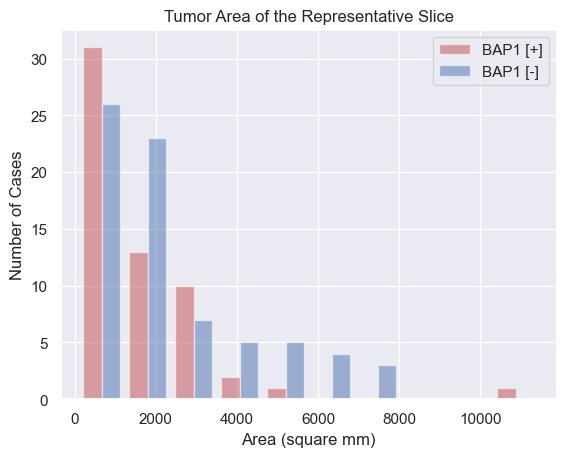

In [28]:
# Plot histogram of tumor area for middle slice
plt.pyplot.xlabel("Area (square mm)")
plt.pyplot.title("Tumor Area of the Representative Slice")
plt.pyplot.ylabel("Number of Cases")
sns.set_theme()
plt.pyplot.hist([y_size, n_size],color=['r','b'], alpha=0.5, label=['BAP1 [+]','BAP1 [-]'] )
plt.pyplot.legend()

Text(0, 0.5, 'Number of Cases')

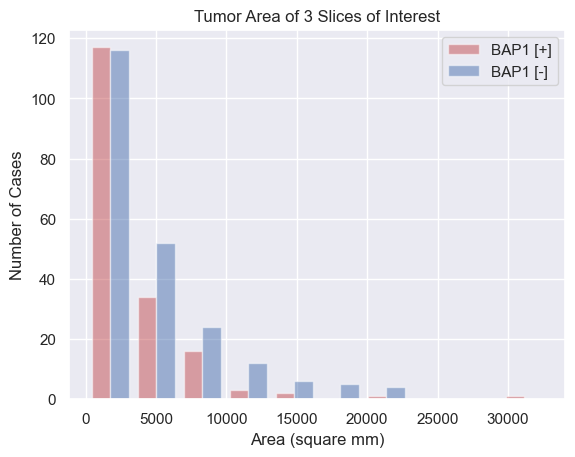

In [29]:
# Plot tumor area of all 3 slices of interest added together

sns.set_theme()
plt.pyplot.hist([tot_y_size, tot_n_size],color=['r','b'], alpha=0.5, label=['BAP1 [+]','BAP1 [-]'] )
plt.pyplot.legend()
plt.pyplot.title("Tumor Area of 3 Slices of Interest")
plt.pyplot.xlabel("Area (square mm)")
plt.pyplot.ylabel("Number of Cases")

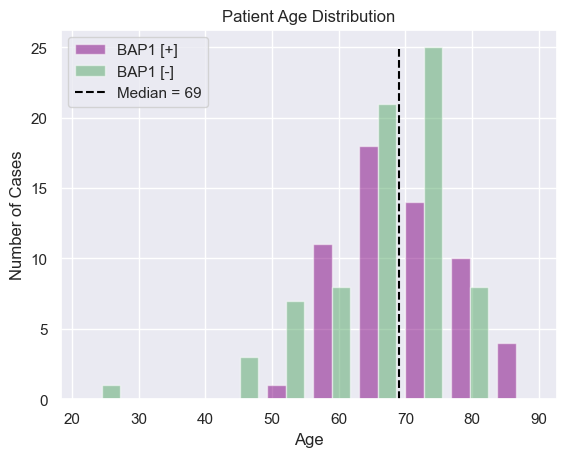

In [30]:
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("Number of Cases")
plt.pyplot.title("Patient Age Distribution")
sns.set_theme()
plt.pyplot.hist([y_age,n_age], color=['purple','g'], alpha=0.5,label=['BAP1 [+]','BAP1 [-]'])
plt.pyplot.vlines(x = 69 , ymin = 0, ymax = 25,
          linestyles = "dashed", colors = "black", label = "Median = 69")  
plt.pyplot.legend()

In [31]:
print(f"Mean BAP1 [-] size: {mean(n_size)}")
print(f"Mean BAP1 [+] size: {mean(y_size)}")

print(f"Median BAP1 [-] size: {median(n_size)}")
print(f"Median BAP1 [+] size: {median(y_size)}")

Mean BAP1 [-] size: 2317.9536682269845
Mean BAP1 [+] size: 1678.8447525876143
Median BAP1 [-] size: 1711.0338013917399
Median BAP1 [+] size: 1178.3209775373898


In [32]:
# Determine tumor size in relation to classifier prediction
predictionsPath = r'/Users/ilanadeutsch/Desktop/predictions.csv'
predictions = pd.read_csv(predictionsPath)

sizePath = r'/Users/ilanadeutsch/Desktop/tumorsizes.csv'
sizes =  pd.read_csv(sizePath)

y_size = []
n_size = []

for val1, case1 in enumerate(predictions["Case"]):
    for val2, case2 in enumerate(sizes["Case"]):

        if case1 in case2:

            if predictions.iloc[val1,2] == predictions.iloc[val1,3]:
                y_size.append(sizes.iloc[val2,1])
            else:
                n_size.append(sizes.iloc[val2,1])

print(f"Mean correctly classified tumor size: {mean(y_size)}")
print(f"Mean incorrectly classified tumor size: {mean(n_size)}")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ilanadeutsch/Desktop/predictions.csv'